In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import inflection as inf
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', na_values=['NA'], encoding = "iso-8859-1")

# removing leading and trailing spaces.
df['PMID/PMCID'] = df['PMID/PMCID'].str.strip()
df['Journal title']=df['Journal title'].str.strip()
df = df.dropna(axis='index', subset=['PMID/PMCID', 'COST (£) charged to Wellcome (inc VAT when charged)'])
df = df.drop_duplicates()


df.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 1 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              1928 non-null object
Journal title                                          1928 non-null object
Article title                                          1928 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    1928 non-null object
dtypes: object(5)
memory usage: 90.4+ KB


In [2]:
#df['new_col'] = df['PMID/PMCID'].str.replace('PMCID:?' , '').str.replace('PMID:?' , '').str.replace("\\n" , '').str.replace("," , '').str.replace(":" , '').str.replace(' ' , '').str.split(" ")

#df['new_col'] = df['PMID/PMCID'].str.split(" ") 

#df['PMCID']=df['PMID/PMCID'].str.findall('PMC[0-9]+').apply(''.join)
#df['PMID']=df['PMID/PMCID'].str.findall('2\d{7}').apply(''.join)
#df['PMCID2']=df['PMID/PMCID'].str.findall('3\d{6}').apply(''.join)
#df['PMCID2']=df['PMID/PMCID'].str.findall('3\d{6}')
#df['PMCID3']=df.PMCID2.count

def find_pmcid(x):
    find_pmcid = re.findall('3\d{6}', x)
    if len(find_pmcid) > 1:
        find_pmcid = find_pmcid [-1]
   
    return find_pmcid
def find_pmid(x):
    find_pmid = re.findall('2\d{7}',x)
    if len(find_pmid) > 1:
        find_pmid = find_pmid [-1]
    return find_pmid


df['PMCID']=df['PMID/PMCID'].apply(find_pmcid).apply(''.join)
df['PMID']=df['PMID/PMCID'].apply(find_pmid).apply(''.join)





In [3]:
df.PMID=df.PMID.str.strip()
# df['PMID']=df['PMID'].astype(int)
# df['PMCID']=df['PMCID'].astype(int)
# df=df.dropna(subset=['PMCID', 'PMID'], how='all')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 1 to 2126
Data columns (total 7 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              1928 non-null object
Journal title                                          1928 non-null object
Article title                                          1928 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    1928 non-null object
PMCID                                                  1928 non-null object
PMID                                                   1928 non-null object
dtypes: object(7)
memory usage: 120.5+ KB


In [5]:
# First lets correct the column names
df=df.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'})
# And fix the irregular pund sign
df['Cost']=df['Cost'].str.replace("£" , '').str.replace("$" , '')
df['Cost']=df['Cost'].astype(float)
# remove outliers 
df = df[(df.Cost < 9999)]
df = df[(df.Cost > 50)]

df.head(500)

,PMID/PMCID,Publisher,Journal title,Article title,Cost,PMCID,PMID
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,3679557,
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,3506128,23043264
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,3646402,23438330
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,3601604,23438216
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20,3579457,
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95,3709265,
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33,3495574,23057412
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59,3780468,
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78,3621575,
10,PMCID: PMC3739413,ACS (Amercian Chemical Society) Publications,Journal of Chemical Information and Modeling,Locating Sweet Spots for Screening Hits and Ev...,1329.69,3739413,


In [6]:
## Clean the change line, tab, special characters in the 'Publisher'
df['Publisher']=df['Publisher'].str.replace("\\n" , ' ').str.replace("\\t", ' ')
df['Publisher']=df['Publisher'].str.replace("," , '').str.replace(":" , '').str.replace("&" , 'and')
df['Publisher']=df['Publisher'].str.replace("." , '').str.replace("  " , ' ').str.replace("/" , ' ').str.strip()


In [7]:
df.groupby('Publisher').count()

,PMID/PMCID,Journal title,Article title,Cost,PMCID,PMID
Publisher,,,,,,
ACS,7,7,7,7,7,7
ACS (Amercian Chemical Society) Publications,5,5,5,5,5,5
ACS Publications,2,2,2,2,2,2
AGA Institute,1,1,1,1,1,1
AMBSB,1,1,1,1,1,1
AMERICAN CHEMICAL SOCIETY,1,1,1,1,1,1
ASBMB,44,44,44,44,44,44
ASBMB Cadmus,2,2,2,2,2,2
ASBMB Cenveo Publisher Services,1,1,1,1,1,1


In [8]:
## These are the rules for general publishers.

df.loc[df['Publisher'].str.contains('ACS'), 'Publisher'] = 'ACS'
df.loc[df['Publisher'].str.contains('ASBMB'), 'Publisher'] = 'ASBMB'
df.loc[df['Publisher'].str.contains('BMJ'), 'Publisher'] = 'BMJ'
df.loc[df['Publisher'].str.contains('BioMed Central', case = False), 'Publisher'] = 'BioMed Central'
df.loc[df['Publisher'].str.contains('CADMUS', case=False), 'Publisher'] = 'Cadmus'
df.loc[df['Publisher'].str.contains('CUP'), 'Publisher'] = 'Cambridge'
df.loc[df['Publisher'].str.contains('Cambridge', case=False), 'Publisher'] = 'Cambridge'
df.loc[df['Publisher'].str.contains('Cold Spring', case=False), 'Publisher'] = 'Cold Spring Harbor Laboratory Press'
df.loc[df['Publisher'].str.contains('Company of Biologists', case=False), 'Publisher'] = 'Company of Biologists'
df.loc[df['Publisher'].str.contains('Elsevier', case=False), 'Publisher'] = 'Elsevier'
df.loc[df['Publisher'].str.contains('Federation of American Societies', case=False), 'Publisher'] = 'FASEB'
df.loc[df['Publisher'].str.contains('Frontier', case=False), 'Publisher'] ='Frontiers Media'
df.loc[df['Publisher'].str.contains('Future Medicine', case=False), 'Publisher'] = 'Future Medicine'
df.loc[df['Publisher'].str.contains('Hindawi', case=False), 'Publisher'] = 'Hindawi Publishing Corporation'
df.loc[df['Publisher'].str.contains('Impact', case=False), 'Publisher'] = 'Impact'
df.loc[df['Publisher'].str.contains('Informa Healthcare', case=False), 'Publisher'] = 'Informa Healthcare'
df.loc[df['Publisher'].str.contains('John Wiley', case=False), 'Publisher'] = 'John Wiley and Sons'
df.loc[df['Publisher'].str.contains('Karger', case=False), 'Publisher'] = 'Karger'
df.loc[df['Publisher'].str.contains('Landes Biosciences', case=False), 'Publisher'] = 'Landes Bioscience'
df.loc[df['Publisher'].str.contains('Mary Ann Liebert', case=False), 'Publisher'] = 'Mary Ann Liebert'
df.loc[df['Publisher'].str.contains('National Academy of Sciences', case=False), 'Publisher'] = 'National Academy of Sciences'
df.loc[df['Publisher'].str.contains('Nature', case=False), 'Publisher'] = 'Nature'
df.loc[df['Publisher'].str.contains('OXFORD UNIVERSITY PRESS', case=False), 'Publisher'] = 'OUP'
df.loc[df['Publisher'].str.contains('Oxford', case=False), 'Publisher'] ='OUP'
df.loc[df['Publisher'].str.contains('plos', case=False), 'Publisher'] = 'PLoS'
df.loc[df['Publisher'].str.contains('pnas', case=False), 'Publisher'] = 'PNAS'
df.loc[df['Publisher'].str.contains('Portland Press', case=False), 'Publisher'] = 'Portland Press'
df.loc[df['Publisher'].str.contains('Proceedings of the National Academy of Sciences', case=False), 'Publisher'] = 'PNAS'
df.loc[df['Publisher'].str.contains('Public Library of Science', case=False), 'Publisher'] = 'PLos'
df.loc[df['Publisher'].str.contains('RSC', case=False), 'Publisher'] = 'Royal Society'
df.loc[df['Publisher'].str.contains('Royal Society', case=False), 'Publisher'] = 'Royal Society'
df.loc[df['Publisher'].str.contains('sage', case=False), 'Publisher'] = 'Sage'
df.loc[df['Publisher'].str.contains('Springer', case=False), 'Publisher']= 'Springer'
df.loc[df['Publisher'].str.contains('Springer-Verlag', case=False), 'Publisher'] ='Springer'
df.loc[df['Publisher'].str.contains('Taylor and Francis', case=False), 'Publisher'] = 'Taylor and Francis'
df.loc[df['Publisher'].str.contains('American Chemical Society', case=False), 'Publisher'] = 'ACS'
df.loc[df['Publisher'].str.contains('American Society for Biochemistry and Molecular Biology', case=False), 'Publisher'] = 'ASBMB'
df.loc[df['Publisher'].str.contains('The Company of Biologists', case=False), 'Publisher'] = 'The Company of Biologists'
df.loc[df['Publisher'].str.contains('Wiley', case=False), 'Publisher'] = 'Wiley'
df.loc[df['Publisher'].str.contains('Wolters Kluwer', case=False), 'Publisher'] = 'Wolters Kluwer'



In [9]:
df.groupby('Publisher').count()

,PMID/PMCID,Journal title,Article title,Cost,PMCID,PMID
Publisher,,,,,,
ACS,33,33,33,33,33,33
AGA Institute,1,1,1,1,1,1
AMBSB,1,1,1,1,1,1
ASBMB,67,67,67,67,67,67
ASBMC CENVEO,1,1,1,1,1,1
ASM,2,2,2,2,2,2
ASM (American Society for Microbiology),1,1,1,1,1,1
American Association of Immunologists,2,2,2,2,2,2
American College of Chest Physicians,1,1,1,1,1,1


The publisher is still a bit messy. 

In [10]:
## To correct things like typo and misspelling
Publisher_dict={
    'AMBSB':'ASBMB',
    'ASBMC  CENVEO':'ASBMB',
    'ASM (American Society for Microbiology)':'American Society for Microbiology',
    'American Society of Microbiology':'American Society for Microbiology',
    'American Soc for Biochemistry and Molecular Biology':'ASBMB',
    'American Society for Biochemistry and Molecular Biolgy':'ASBMB',
    'American Society for Biochemistry and Molecular Biology':'ASBMB',
    'American Society for Biochemistry and Molecular Biology':'ASBMB',
    'American Society of Hamatology':'American Society of Hematology',
    'Benthan Science Publishers':'Bentham Science Publishers',
    'BMC':'BioMed Central',
    'Bioscientifica':'BioScientifica',
    'Byophysical Society':'Biophysical Society',
    'Camdus Journal Services':'Cadmus',
    'Cenveo Publisher Services ASM JV1': 'ASM',
    'Company of Biologist':'Company of Biologists',
    'Darmouth Journal Services':'Dartmouth Journal Services',
    'Dartmouth Journals Services':'Dartmouth Journal Services',
    'Dartmouth Journals':'Dartmouth Journal Services',
    'Elseveier Science':'Elsevier',
    'Society for Endocrinology':'Endocrine Society',
    'MIT PRESS OPEN ACCESS':'MIT Press',
    'MY JOVE CORP':'MYJoVE Corporation',
    'National Academy of Sciences':'PNAS',
    'PLos':'PLoS',
    'PubMed Central':'PubMed',
    'Society for Genermal Microbiology':'Society for General Microbiology',
    'Society for Neurosciences':'Society for Neuroscience',
    'Society of Leukocyte Biology': 'Society for Leukocyte Biology',
    'The Endocrine Socety': 'Endocrine Society',
    'The Endocrine Society':'Endocrine Society',
    'THE ENDOCRINE SOCIETY': 'Endocrine Society',
    'The American Physiological Society':'American Physiological Society',
    'The American Society of Pediatrics':'American Psychiatric Publishing',
    'The company of Biolgists': 'Company of Biologists',
    'Wliey-Blackwell':'Wiley',
    'Federation of the American Society of Experimental Biology':'FASEB',
    'SOCIETY OF NEURO SCIENCES':'Society for Neuroscience',
    
    
}
df['Publisher']=df['Publisher'].replace(Publisher_dict)

In [11]:
df.groupby('Publisher').count()

,PMID/PMCID,Journal title,Article title,Cost,PMCID,PMID
Publisher,,,,,,
ACS,33,33,33,33,33,33
AGA Institute,1,1,1,1,1,1
ASBMB,71,71,71,71,71,71
ASM,3,3,3,3,3,3
American Association of Immunologists,2,2,2,2,2,2
American College of Chest Physicians,1,1,1,1,1,1
American Physiological Society,8,8,8,8,8,8
American Psychiatric Publishing,2,2,2,2,2,2
American Psychological Association,14,14,14,14,14,14


The publisher column is now cleaned.  The following analysis is going to discuss the publisher count > 15 for popularity and representation.  Of course this criterion can be changed if necessary.   

In [12]:
df1 = df.groupby('Publisher').count()
df1 = df1[['PMID']]
df1 = df1.rename(columns = {'PMID':'pub_num'})
df2 = df.groupby('Publisher').mean()

pub_result = pd.concat([df1, df2], axis = 1, sort = False)
pub_result['Publisher'] = pub_result.index

In [13]:
pub_result = pub_result.loc[pub_result.pub_num > 15]
pub_result = pub_result.sort_values(by = ['Cost'], ascending = False)
pub_result.head()

,pub_num,Cost,Publisher
Publisher,,,
Nature,75,2646.380800,Nature
Elsevier,359,2449.520000,Elsevier
Taylor and Francis,16,2242.610625,Taylor and Francis
Dartmouth Journal Services,22,2235.979091,Dartmouth Journal Services
Endocrine Society,16,2097.514375,Endocrine Society


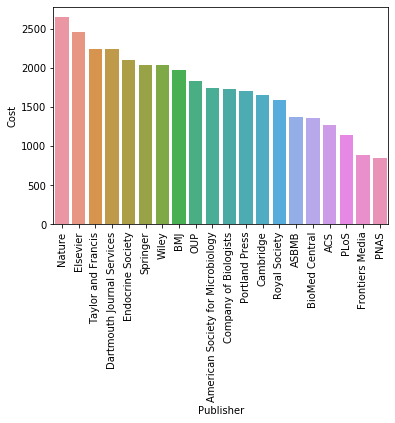

In [14]:
sns.barplot(x='Publisher', y='Cost', data=pub_result)
plt.xticks(rotation=90)
plt.show()

In [15]:
df['Journal_short']=df['Journal title'].str.lower().str.replace("\\n" , ' ').str.replace("," , '')
df['Journal_short']=df['Journal_short'].str.replace(":" , '').str.replace("&" , 'and').str.replace("." , '')
df['Journal_short']=df['Journal_short'].str.replace("  " , ' ').str.replace("for" , '').str.replace("of" , '')
df.shape

(1885, 8)

In [16]:
df.groupby('Journal_short').count().head(500)

,PMID/PMCID,Publisher,Journal title,Article title,Cost,PMCID,PMID
Journal_short,,,,,,,
academy nutrition and dietetics,1,1,1,1,1,1,1
acs chemical biology,4,4,4,4,4,4,4
acs chemical neuroscience,1,1,1,1,1,1,1
acs nano,2,2,2,2,2,2,2
acta crystallographica section d,1,1,1,1,1,1,1
acta crystallographica section d biological crystallography,2,2,2,2,2,2,2
acta crystallographica section f structural biology and crystallization communications,2,2,2,2,2,2,2
acta crystallography d,1,1,1,1,1,1,1
acta d,1,1,1,1,1,1,1


In [17]:
df.loc[df['Journal_short'].str.contains('ACS'), 'Publisher'] = 'ACS'

In [18]:
replace_dict={
    'acta crystallographica section d':'acta crystallographica section d biological crystallography',
    'acta crystallography d':'acta crystallographica section d biological crystallography',
    'acta d': 'acta crystallographica section d biological crystallography',
    'american jnl epidemiology':'american journal of epidemiology',
    'acta f': 'acta crystallographica section f structural biology and crystallization communications',
    'acta neuropathol':'acta neuropathologica',
    'americal journal of psychiatry':'american journal of psychiatry',
    'am j bioeth':'american journal of bioethics--neuroscience',
    'am j trop med hyg':'american journal of tropical medicine & hygiene',
    'american journal of medical genetics part a':'american journal of medical genetics',
    'antimicobial agents and chemotherapy':'antimicrobial agents and chemotherapy',
    'antimicrobial agfents and chemotherapy':'antimicrobial agents and chemotherapy',
    'antioxidants & redox signaling':'antioxidants and redox signaling',
    'behavior research and therapy':'behaviour research and therapy',
    'bioinformatics':'bioinformatics',
    'bba - molecular basis of disease':'biochimica et bioohysica acta - molecular basis of disease',
    'biochimica et bioohysica acta - gene regulatory mechanisms':'biochimica et biophysica acta - gene regulatory mechanisms',
    'biochimica et bioohysica acta - molecular basis of disease':'biochimica et biophysica acta - molecular basis of disease',
    'biol open':'biology open',
    'bms genomics':'bmc genomics'
    
    
}

df['Journal_short']=df['Journal_short'].replace(replace_dict)



In [19]:
df.groupby('Journal_short').count().head(100)

,PMID/PMCID,Publisher,Journal title,Article title,Cost,PMCID,PMID
Journal_short,,,,,,,
academy nutrition and dietetics,1,1,1,1,1,1,1
acs chemical biology,4,4,4,4,4,4,4
acs chemical neuroscience,1,1,1,1,1,1,1
acs nano,2,2,2,2,2,2,2
acta crystallographica section d biological crystallography,5,5,5,5,5,5,5
acta crystallographica section f structural biology and crystallization communications,3,3,3,3,3,3,3
acta dermato venereologica,1,1,1,1,1,1,1
acta diabetologica,1,1,1,1,1,1,1
acta neuropathologica,3,3,3,3,3,3,3


In [20]:
df.describe()

,Cost
count,1885.000000
mean,1819.492318
std,759.484659
min,122.310000
25%,1268.700000
50%,1834.770000
75%,2295.390000
max,6000.000000


In conclusion, it would take a huge effort to clean the journal title.  This may not be the right way for a data scientist to correct the data row by row unless it is absolutely necessary.  